# MACHINE LEARNING

We will build model in a seperate file notebook for memory efficiency.

In [41]:
# Imports:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error,
    root_mean_squared_error, r2_score)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignone harmless warnings:
warnings.filterwarnings('ignore')

# Round float columns to 4 decimal places:
pd.options.display.float_format = '{:.4f}'.format

# Plot rcParams:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 144
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titleweight'] = 'bold'
plt.style.use('seaborn-v0_8')

In [2]:
# Read train data:
train = pd.read_csv('train.csv')
train.head()

,SalesQuantity,IsPromoWeek,WeightedProductLabel_Fast,WeightedProductLabel_Slow,WeightedStoreLabel_Fast,WeightedStoreLabel_Slow
0,1.0,False,False,False,False,False
1,1.0,False,False,False,False,False
2,1.0,False,False,True,False,False
3,1.0,False,False,False,False,False
4,1.0,False,False,True,False,False


In [3]:
# Read test data:
test = pd.read_csv('test.csv')
test.head()

,SalesQuantity,IsPromoWeek,WeightedProductLabel_Fast,WeightedProductLabel_Slow,WeightedStoreLabel_Fast,WeightedStoreLabel_Slow
0,2.0,True,False,True,False,False
1,1.0,True,False,True,False,False
2,1.0,True,False,True,False,False
3,0.0,True,False,True,False,False
4,0.0,True,False,True,False,False


In [4]:
# Define features and target;
X_train = train.drop(columns='SalesQuantity')
y_train = train['SalesQuantity']
X_test = test.drop(columns='SalesQuantity')
y_test = test['SalesQuantity']

In [5]:
# Build randomized grid search model:
base_model = RandomForestRegressor()

param_dist = {
    'n_estimators': np.arange(50, 201, 10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],                  
}

grid_search = RandomizedSearchCV(estimator=base_model,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_squared_error',
                                 cv=5,
                                 n_iter=100,
                                 n_jobs=6,                          
                                 verbose=0,
                                 random_state=42,)

In [ ]:
# Fit model and get the best parameters:
grid_search.fit(X_train, y_train)

In [57]:
(pd.DataFrame(grid_search.cv_results_)
 .sort_values('rank_test_score')
 .to_excel('grid_search_results.xlsx', index=False))

In [7]:
print(f"Best Parameters: {grid_search.best_params_}\n")
print(f"Best Score: {grid_search.best_score_}\n")

Best Parameters: {'n_estimators': 60, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}

Best Score: -10.140995074270476



In [43]:
# Most important features:
dict(
    zip(grid_search.best_estimator_.feature_names_in_,
    grid_search.best_estimator_.feature_importances_
))

{'IsPromoWeek': 0.02532836490789763,
 'WeightedProductLabel_Fast': 0.7710079178694155,
 'WeightedProductLabel_Slow': 0.08420238503037962,
 'WeightedStoreLabel_Fast': 0.0888331511644902,
 'WeightedStoreLabel_Slow': 0.030628181027817183}

In [25]:
# Get predictions and calculate the error:
y_pred = grid_search.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
print(f'Mean absolute error: {mae}')
print(f'Root mean squared error: {rmse}')

Mean absolute error: 2.000469732497644
Root mean squared error: 4.090640985076


In [60]:
# Describe the test data:
y_test.describe()

count   30209.0000
mean        2.2006
std         4.3141
min       -18.0000
25%         0.5000
50%         1.0000
75%         2.0000
max       192.0000
Name: SalesQuantity, dtype: float64

In [59]:
# Describe the pred data:
pd.Series(y_pred).describe()

count   30209.0000
mean        2.1736
std         1.5611
min         1.2502
25%         1.4648
50%         1.6571
75%         2.0433
max         9.5680
dtype: float64

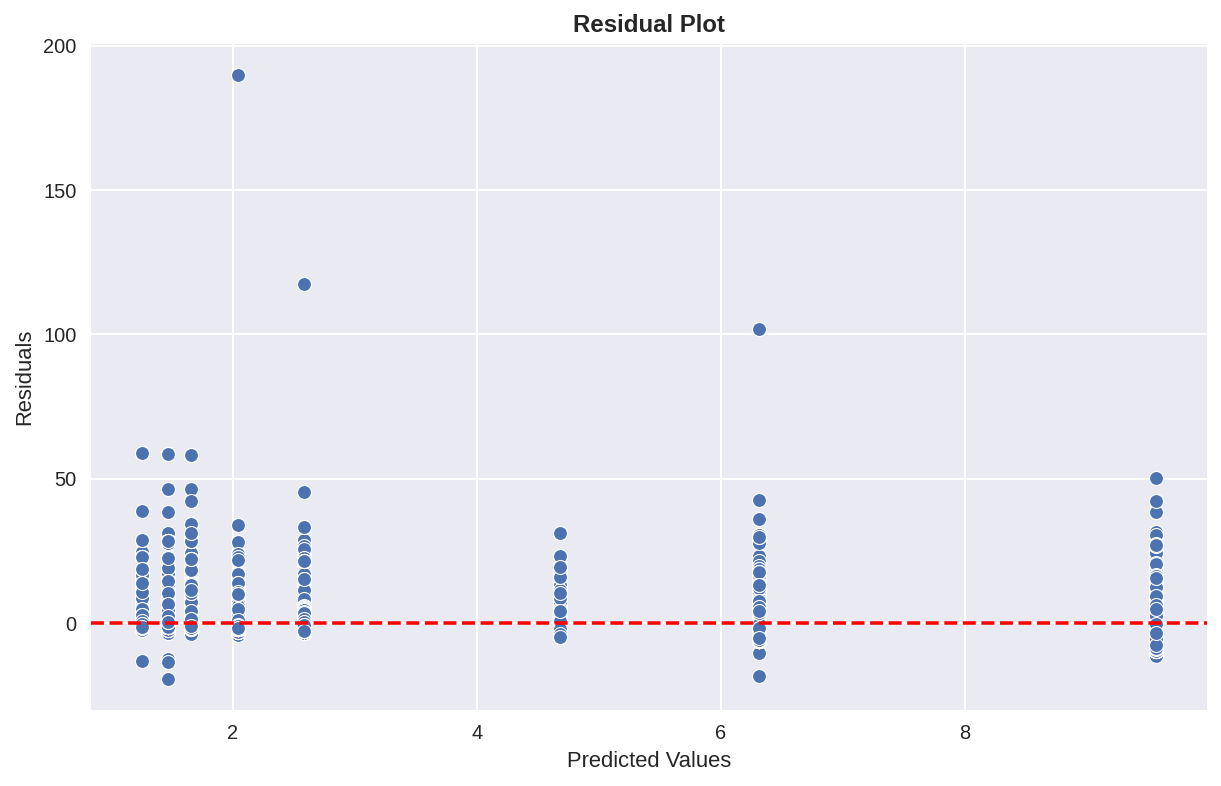

In [44]:
# Residual plot:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=(y_test - y_pred))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

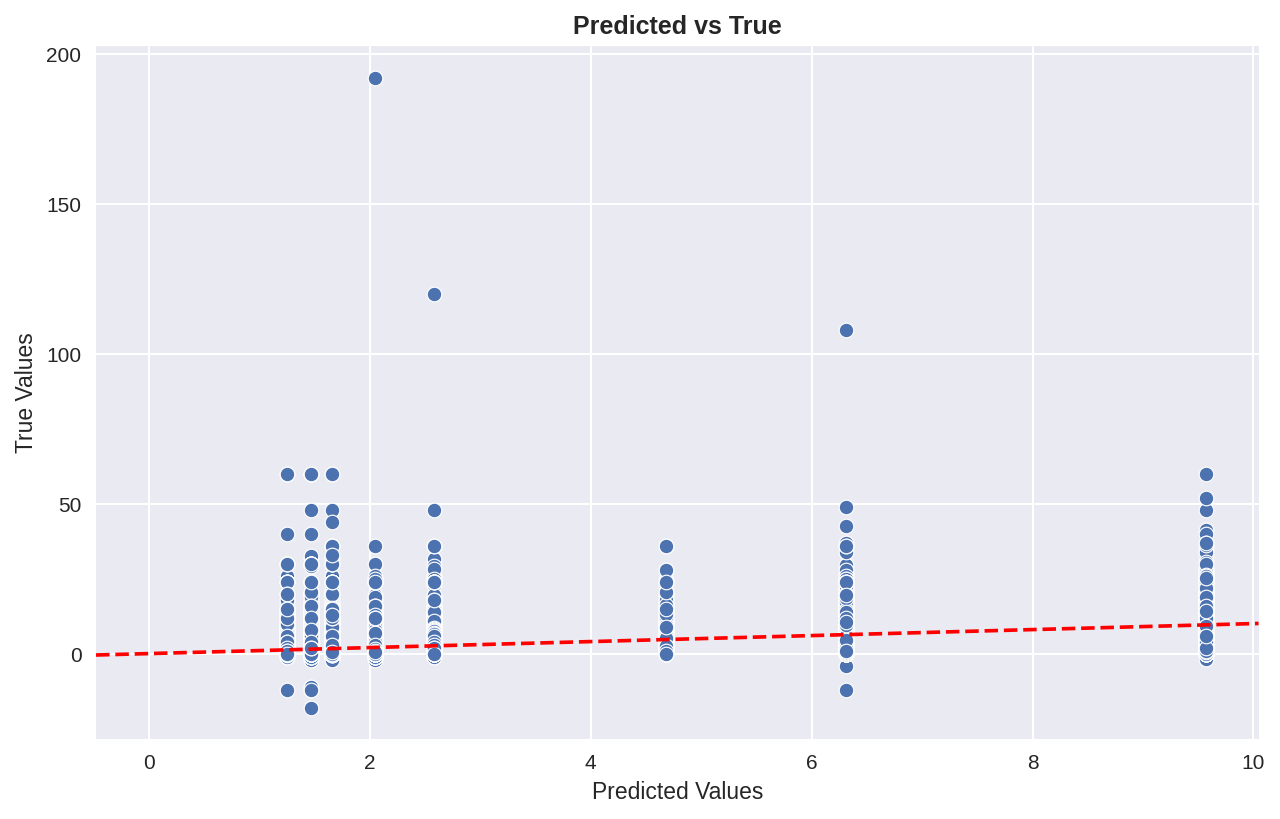

In [61]:
# Predicted vs True
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(x=y_pred, y=y_test)
plt.axline((0, 0), (1, 1), color='r', linestyle='--')
plt.title('Predicted vs True')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

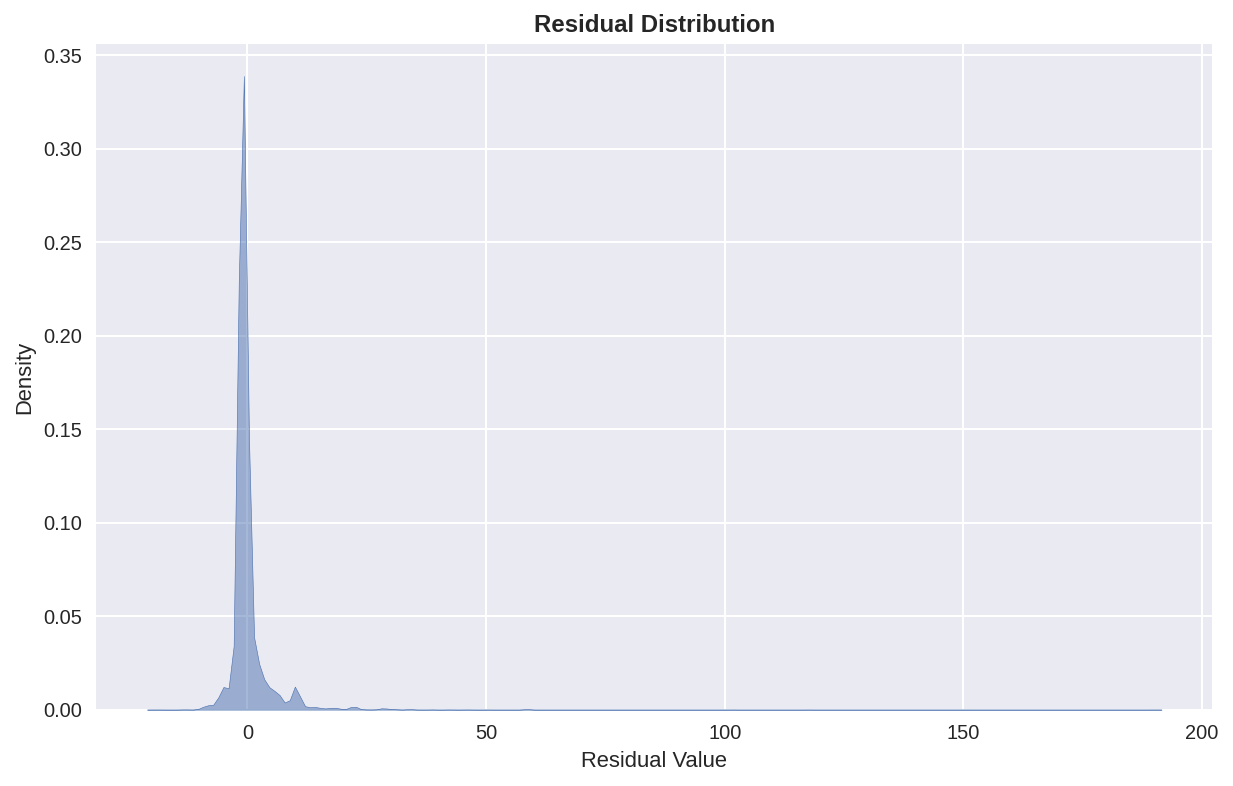

In [48]:
# Residual Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, fill=True, alpha=0.50)
plt.title('Residual Distribution')
plt.xlabel('Residual Value')
plt.show()

Model perfomance and improvements are discussed in the report pdf.